## Bar charts and their properties in plotly.express

We use plotly express for simple graphs such as barcharts

https://plotly.com/python/bar-charts/

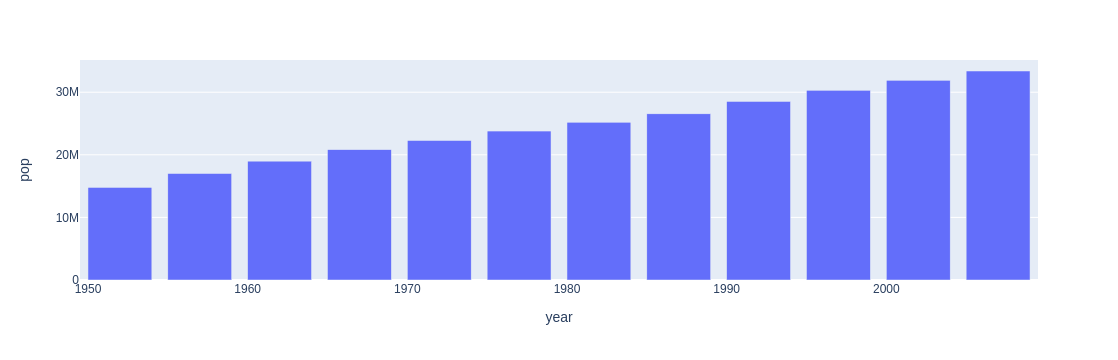

In [2]:
import plotly.express as px
#this is how we import plotly express

data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

#### Bar charts with wide and long format data
You can essentially stack more information on a bar graph using the colour flag
The difference between wide and long is how they display their data tables.

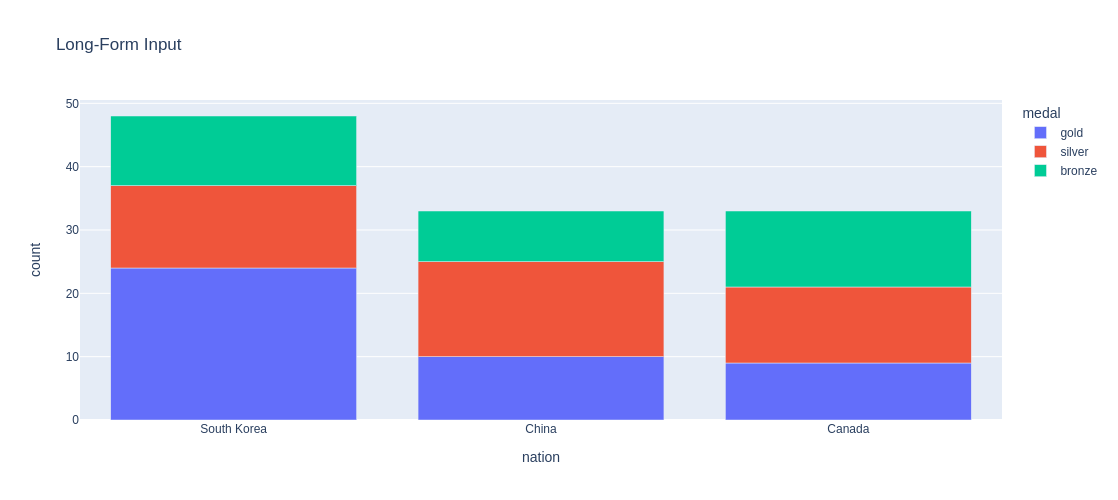

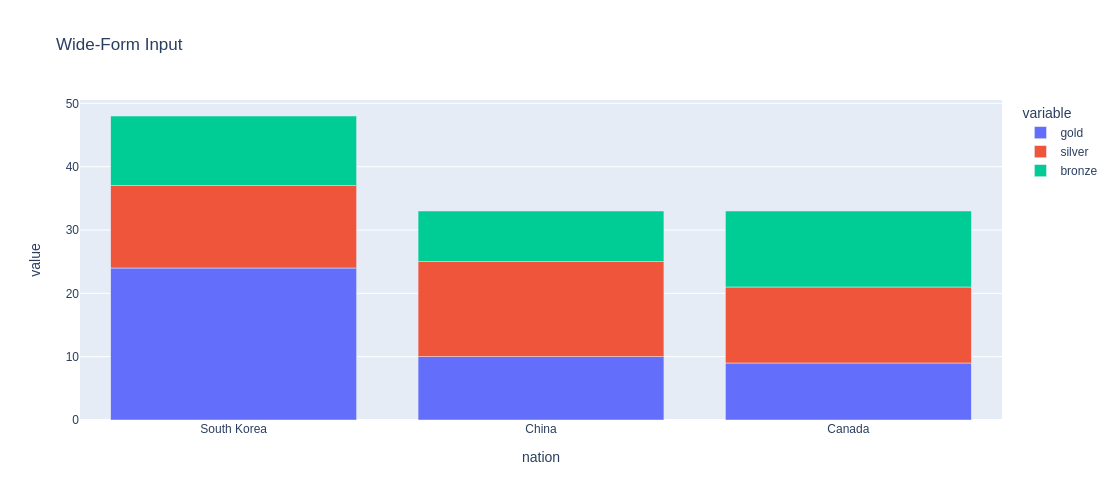

In [14]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input", height = 500)
fig.show()

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input", height = 500)
fig.show()

#See the use of height flag. This can be used for width aswell.

In [24]:
#The main difference between long and wide is how their data table displays. 
wide_df

nation  gold  silver  bronze
0  South Korea    24      13      11
1        China    10      15       8
2       Canada     9      12      12

In [23]:
long_df

nation   medal  count
0  South Korea    gold     24
1        China    gold     10
2       Canada    gold      9
3  South Korea  silver     13
4        China  silver     15
5       Canada  silver     12
6  South Korea  bronze     11
7        China  bronze      8
8       Canada  bronze     12

### Coloured bar graphs

To add another data dimension to your bar graph you can utilise colours to convey more information. "hover_data" is used to display information as data is hovered. Labels can be used to better describe axis.

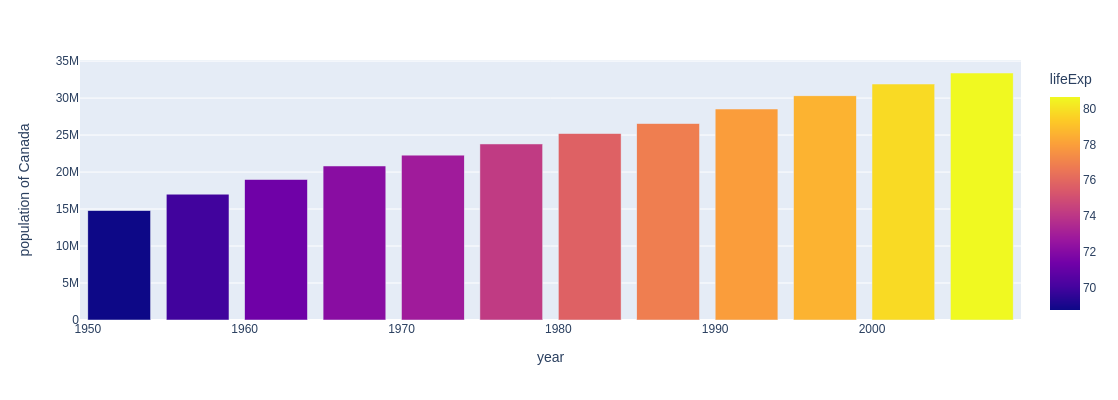

In [25]:
df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

### Stacked vs grouped charts


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


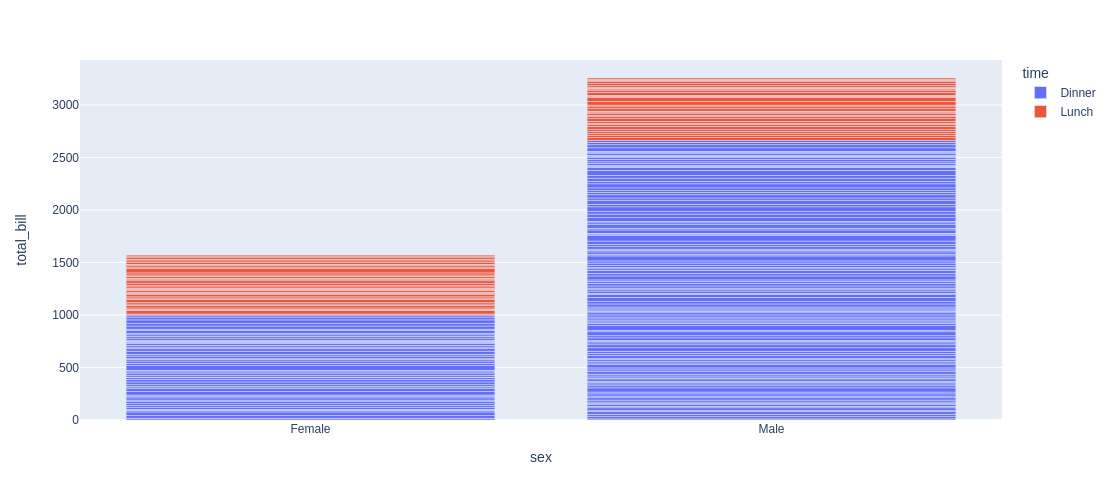

In [29]:
df = px.data.tips()
#Here is an example of how the data is structured
print(df)
fig = px.bar(df, x="sex", y="total_bill", color='time', height = 500)
fig.show()

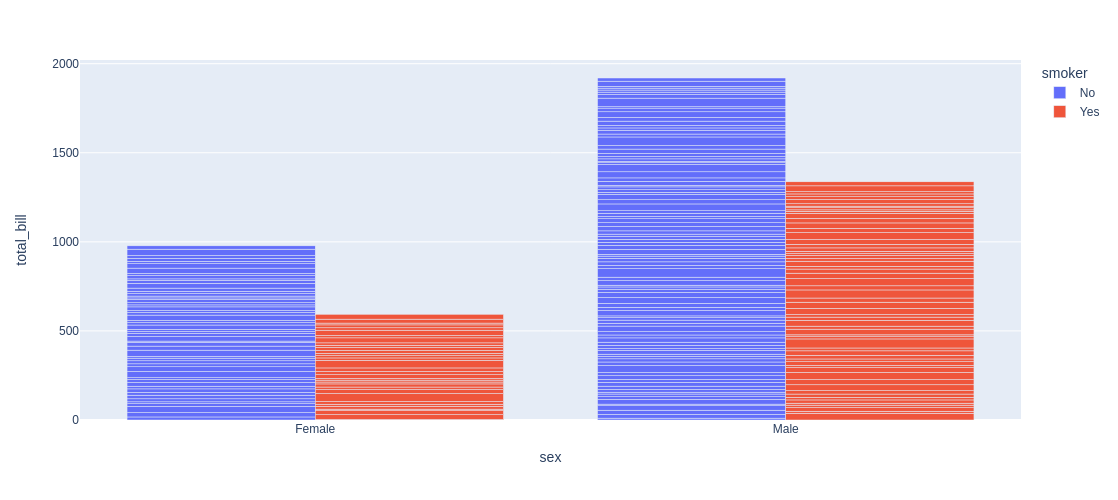

In [31]:
#We can also group the data here they are grouped by if they are a smoker or not. 
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=500)
fig.show()

### Aggragated and disaggragated 
In the previous example the data was stacked on top of each other that was because we used "px.bar". However if we use "px.histogram" we can just combine those data fragments to see the bigger picture. 

px.bar - one rectangle per row of input
px.histogram - one rectangle for the whole

https://plotly.com/python/histograms/

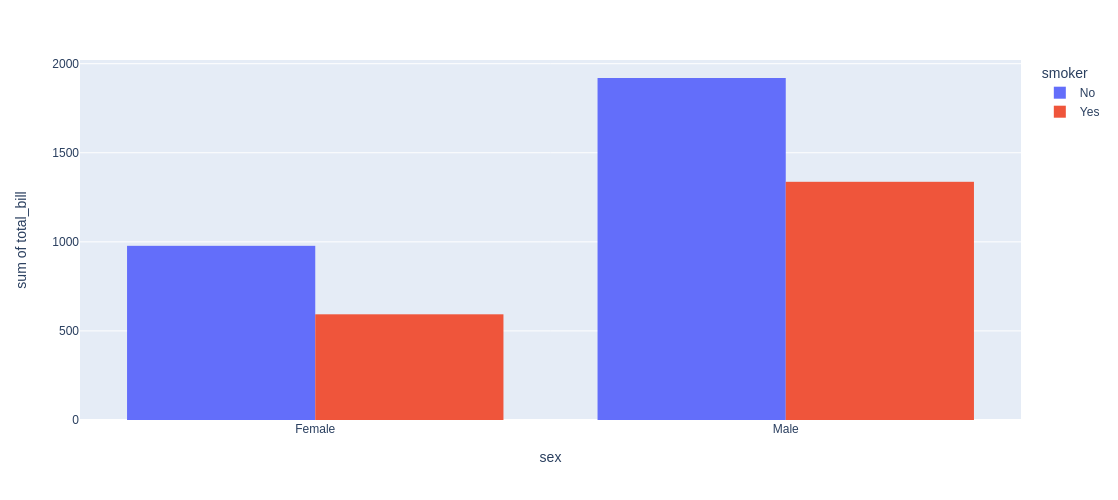

In [34]:
df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=500)
fig.show()
#Same thing only the px.bar changes

The histfunc flag this can be set the avg "histtfunc = 'avg' " which should give the avg total bill payed by each group as opposed to sum of it.

### Bar chart with text 

Bar charts can have text in it which can make viewing simpler especially for non insteractive charts and the ones that are stacked. 

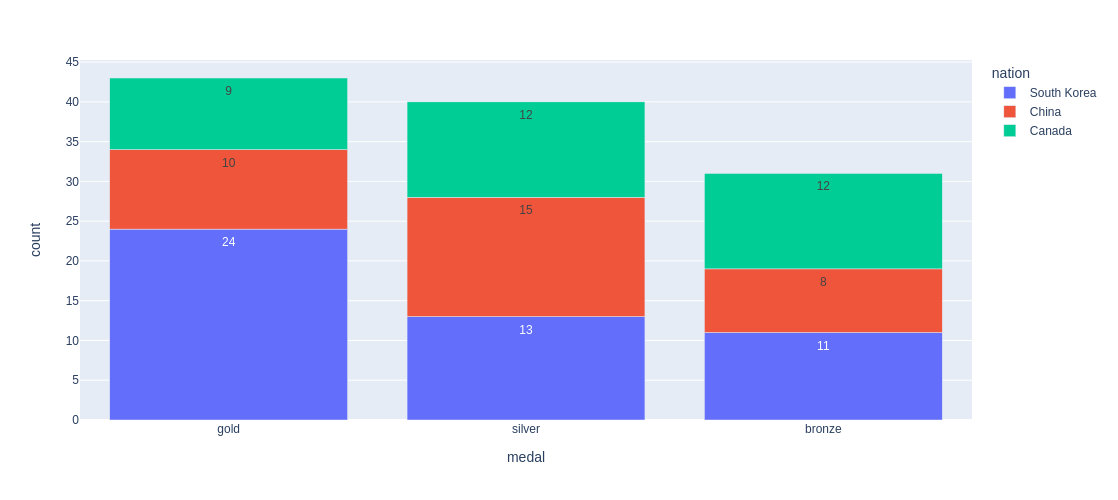

In [38]:
df = px.data.medals_long()
#Use of text_auto = True automatically sets them to their values
fig = px.bar(df, x="medal", y="count", color="nation", text_auto=True, height = 500)
fig.show()

        nation   medal  count
0  South Korea    gold     24
1        China    gold     10
2       Canada    gold      9
3  South Korea  silver     13
4        China  silver     15
5       Canada  silver     12
6  South Korea  bronze     11
7        China  bronze      8
8       Canada  bronze     12


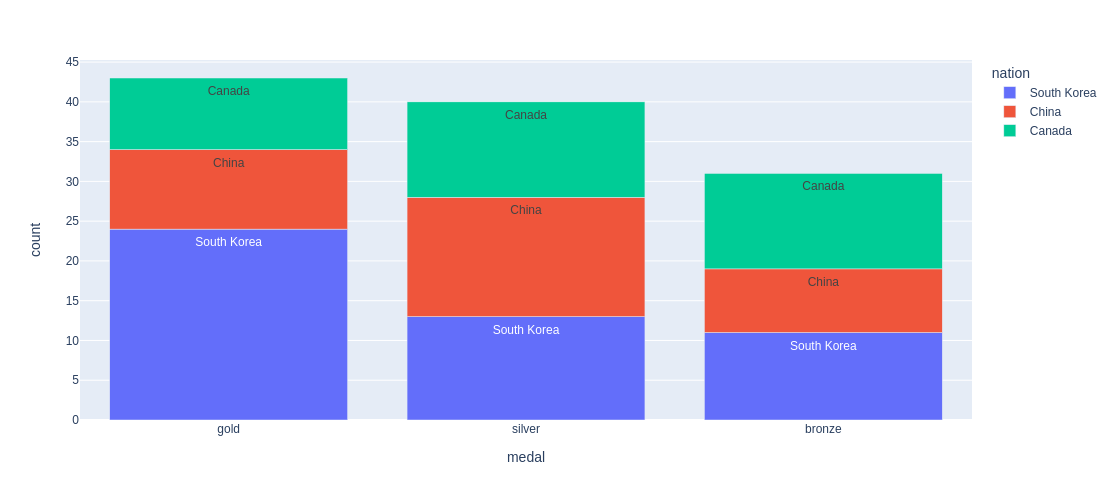

In [40]:
df = px.data.medals_long()
# You can use any column from df to write on to the graph
print(df)
fig = px.bar(df, x="medal", y="count", color="nation", text="nation", height=500)
fig.show()

By default plotly will manipluate the text sizes and oritnations to maximise the number of visible labels. Which can be odd looking. This can be changed using traces. 

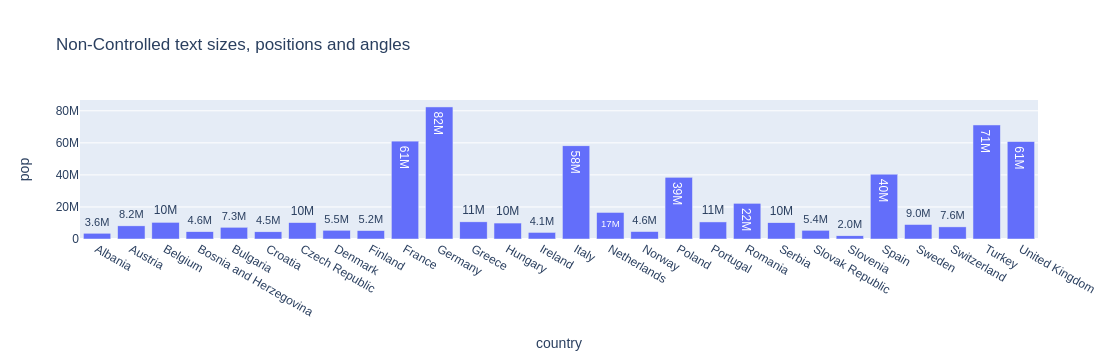

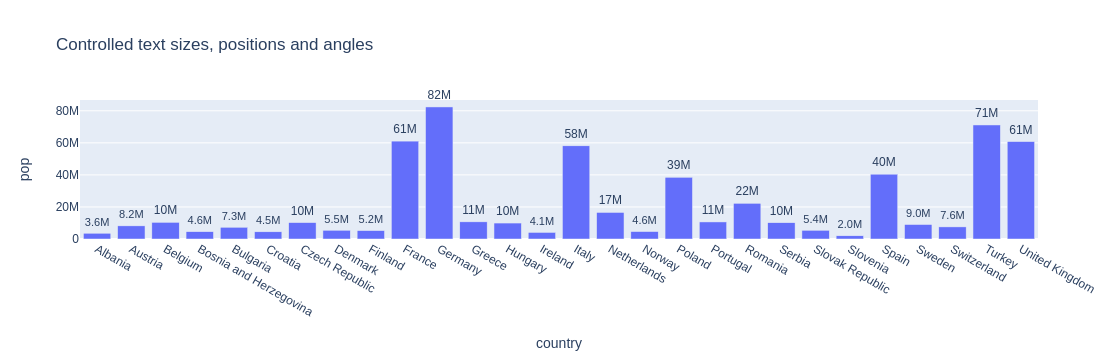

In [42]:
#Here is the default version
df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Non-Controlled text sizes, positions and angles")
fig.show()

#Here is the version with the traces added 

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

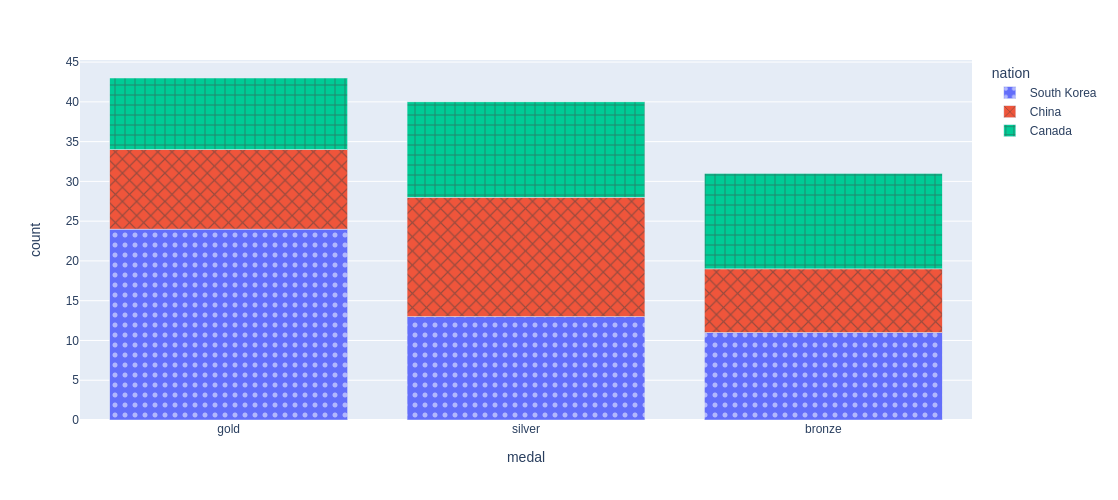

In [44]:
#### An accesibility feauture that plotly has is filling which can be useful for colour blind people

df = px.data.medals_long()

fig = px.bar(df, x="medal", y="count", color="nation",
             pattern_shape="nation", pattern_shape_sequence=[".", "x", "+"], height = 500)
fig.show()

### Faceted sub plots

This can be used to quickly display large quantities of information. 

Use the keyword arguments facet_row to create facetted subplots, where different rows (resp. columns) correspond to different values of the dataframe column specified in facet_row.

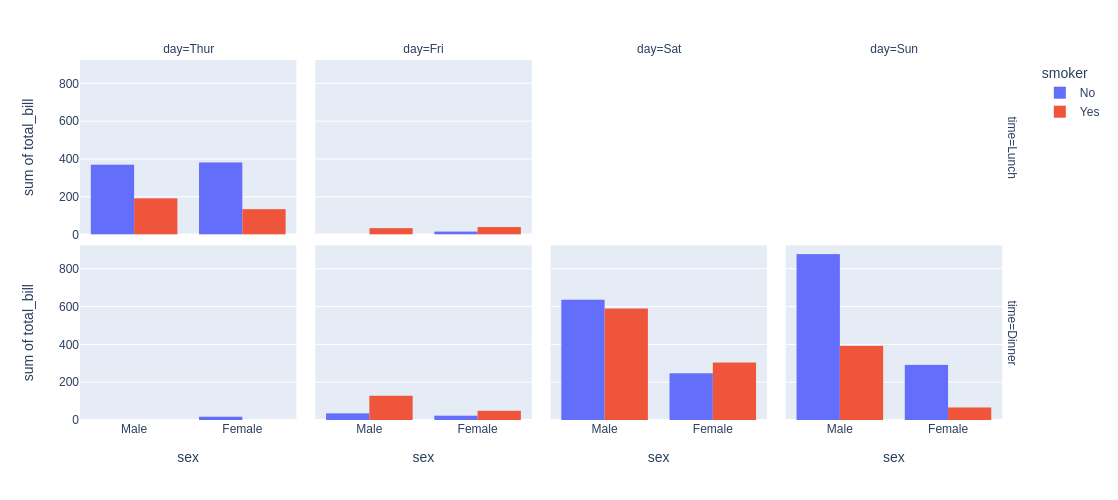

In [48]:
df = px.data.tips()
#px.bar can be used here
fig = px.histogram(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day", height = 500 ,
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

## Basic Bar Charts using graph_objects

Most things covered in plotly express can be done in go.

Here is a simple example to view to syntax differences.
I have given couple other things that arent possible to do using px. 
As well as those examples there are couple more that are unlikely to be useful to our project
Customizing bar widths individually which can tie in to marimekko charts.

You can also have coloured and styled bar chart, bar chart with relative bar mode, bar chart with sorted or ordered categories and bar charts with multicategory axis type. You can also have horizontal bar charts with "orientation = 'h' " 

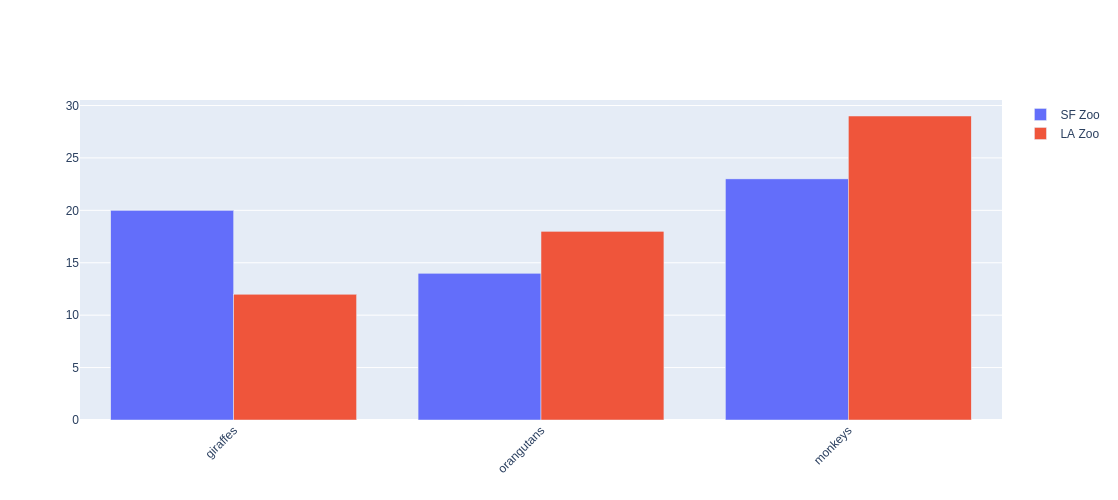

In [53]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group', height=500,xaxis_tickangle = -45)
# Without the xaxis_tick angle flag the lables in the x axis will appear flat however with the flag set to -45 we can angle them. 
fig.show()

To highlight a single column you can use this example

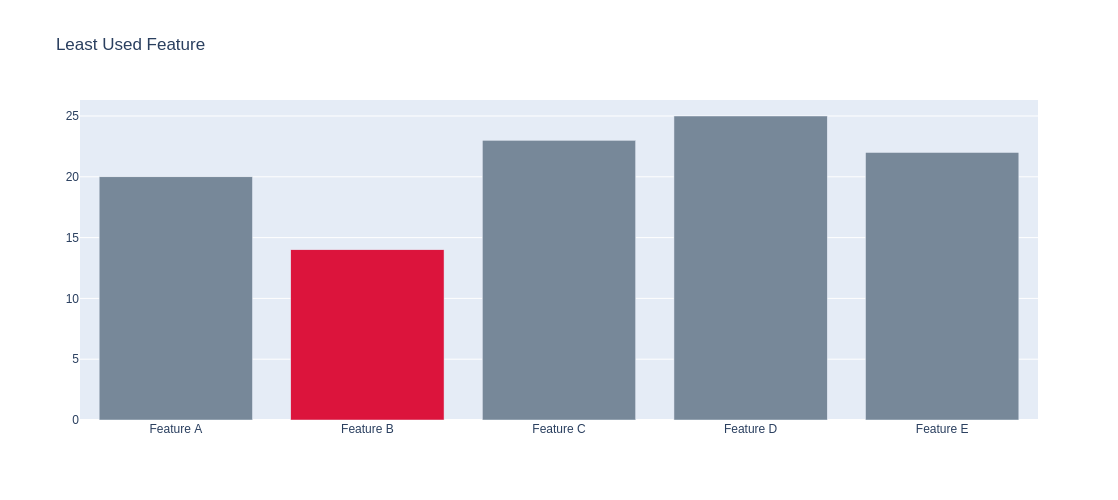

In [56]:
# making all bars gray
colors = ['lightslategray',] * 5
# setting a select bar to a different color
colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=['Feature A', 'Feature B', 'Feature C',
       'Feature D', 'Feature E'],
    y=[20, 14, 23, 25, 22],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature', height = 500)

### Customizing individual bar base

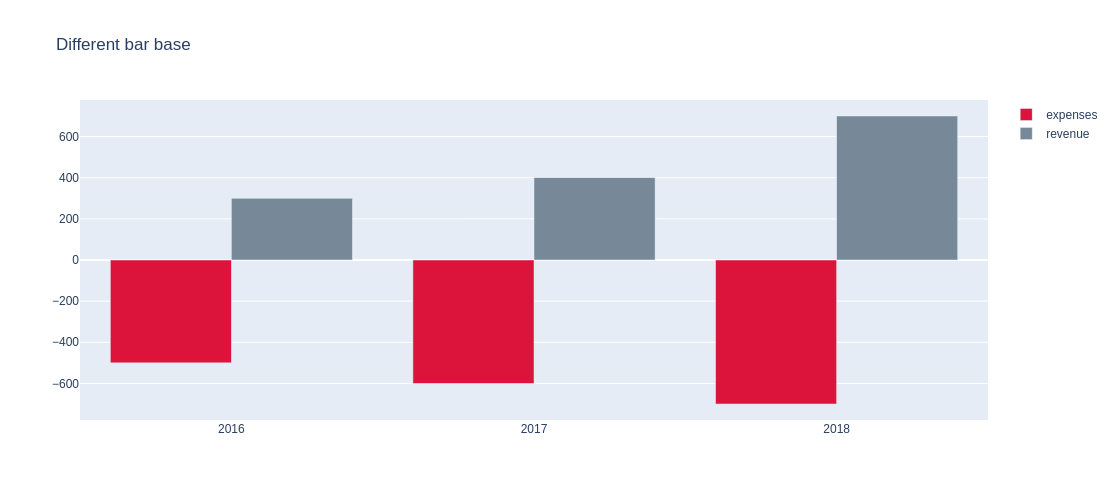

In [59]:

years = ['2016','2017','2018']

fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=[500, 600, 700],
                base=[-500,-600,-700],
                marker_color='crimson',
                name='expenses'))
fig.add_trace(go.Bar(x=years, y=[300, 400, 700],
                base=0,
                marker_color='lightslategrey',
                name='revenue'
                ))
fig.update_layout(title = "Different bar base", height = 500)
fig.show()